In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk import word_tokenize
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())

0it [00:00, ?it/s]


In [200]:
labMT = pd.read_csv("Hedonometer.csv")
labMT.head()



,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
0,0,laughter,laughter,8.50,0.93
1,1,happiness,happiness,8.44,0.97
2,2,love,love,8.42,1.11
3,3,happy,happy,8.30,0.99
4,4,laughed,laughed,8.26,1.16


What are the top 10 words by happiness score, and the bottom 10? Does this surprise you?
- Both the top and bottom words sorted by happiness score are to be expected. (see below)

In [201]:
print(f"Top words:")
print(labMT.sort_values(by = ["Happiness Score"], ascending = False)[0:10]["Word"])
print(f"Bottom words:")
print(labMT.sort_values(by = ["Happiness Score"], ascending = True)[0:10]["Word"])

Top words:
0     laughter
1    happiness
2         love
3        happy
4      laughed
5        laugh
6     laughing
8       laughs
7    excellent
9          joy
Name: Word, dtype: object
Bottom words:
10168        suicide
10169      terrorist
10171    coronavirus
10167           rape
10165         murder
10166      terrorism
10163         cancer
10164          death
10160           died
10161           kill
Name: Word, dtype: object


What are the top 20 controversial words (those for which annotators' ratings disagree the most)? Why do you think they are controversial?

In [202]:
# Most controversial words
labMT.sort_values(by = ["Standard Deviation of Ratings"], ascending = False)[0:20]

,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
8389,8389,fucking,fucking,4.64,2.93
9211,9211,fuckin,fuckin,3.86,2.74
9417,9417,fucked,fucked,3.56,2.71
7990,7990,pussy,pussy,4.80,2.67
3768,3768,whiskey,whiskey,5.72,2.64
9410,9410,slut,slut,3.57,2.63
9600,9600,cigarettes,cigarettes,3.31,2.60
8991,8991,fuck,fuck,4.14,2.58
8748,8748,mortality,mortality,4.38,2.55
9715,9715,cigarette,cigarette,3.09,2.52


Some of the controversial word are related to some sort of pleasure, that also have some health implications or social sigmas when overendulged. Words like Whiskey, cigarettes, porn, beer, wines. 
Other words like fucking, fuckin, fuck, motherfucking both function as swear words and strength markers. 
Generally, as expected, words with a high level of controversy have different meanings dependent on the context.

<AxesSubplot:>

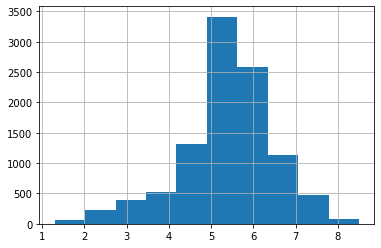

In [203]:
labMT["Happiness Score"].hist() # Make the plot nicer at some point - bins

The Pollyanna hypo says we as human evaluate positive words more frequently than negative words. The histgram support the as the data is more skewed towards the right side of the mean.

Using the labMT data, create a function that, given a document (list of tokens), returns the corresponding "Happiness Score" (see equation 1 in the article). Words that do not exist in the labMT dataset can be ignored.

In [204]:
def find_the_happiness(tokens, happiness_df):
    # Initialize happiness
    avg_happiness = 0
    tokens = [word.lower() for word in set(tokens) if word.isalpha() and word in labMT["Word"].values]
    fdist = nltk.FreqDist(tokens)
    N = len(tokens)
    for token in tokens:
        p = fdist[token] / N
        avg_happiness += happiness_df['Happiness Score'][happiness_df['Word'] == token].item() * p
    return avg_happiness

In [205]:
# Just some testing
text = "My favorite activity is coding all day long. I simply love it!"
text = word_tokenize(text)
print(text)
find_the_happiness(text,labMT)

['My', 'favorite', 'activity', 'is', 'coding', 'all', 'day', 'long', '.', 'I', 'simply', 'love', 'it', '!']


6.177777777777777

# Dictionary based methods

In [206]:
WSB_submissions = pd.read_csv("../Week_6/wallstreet_subs.csv")
WSB_submissions.head()

,created_utc,title,selftext,score
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1


In [207]:

# Tokenize the text of each submission (use the code you created in Week 6, exercise 3, point 2). 
# Add it in a new column of your dataframe called "tokens".
from nltk.corpus import stopwords
WSB_submissions['text'] = WSB_submissions['title'] + ' ' + WSB_submissions['selftext']
stop_words = set(stopwords.words('english'))


def preprocess(text):
    #Removing urls
    text = re.sub(r'http\S+', '', text)
    #Tokenize using nltk
    word_tokens = word_tokenize(text.lower())
    #removing none letter characters and stop words
    filtered_sentence = [w for w in word_tokens if w.isalpha() and w not in stop_words]

    return filtered_sentence

WSB_submissions["tokens"] = WSB_submissions['text'].progress_apply(lambda x: preprocess(x))
WSB_submissions.head()

82242it [01:22, 996.82it/s] 


,created_utc,title,selftext,score,text,tokens
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1,"What is the Fed actually buying? Okay, I may a...","[what, is, the, fed, actually, buying, okay, i..."
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1,I didn’t learn about puts because I was lazy B...,"[i, didn, t, learn, about, puts, because, i, w..."
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1,HOT TAKE Literally everyone has free time on t...,"[hot, take, literally, everyone, has, free, ti..."
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1,"Fuck you Gordon Gordon I believed in you, I ca...","[fuck, you, gordon, gordon, i, believed, in, y..."
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1,Can’t find a picture Someone uploaded a ohoto ...,"[can, t, find, a, picture, someone, uploaded, ..."


Create one document per day in the dataset, containing all tokens for that day. Plot the length of the document (number of tokens) over time. Are documents long enough for using a dictionary-based method? As a rule-of-thumb that 10,000 words are enough to score with a sentiment dictionary confidently.

In [208]:
from datetime import datetime
WSB_submissions["date"] = WSB_submissions["created_utc"].apply(lambda x: datetime.utcfromtimestamp(x).date())
WSB_submissions.set_index("date")
WSB_submissions.head()

token_pr_date = WSB_submissions.groupby("date").tokens.sum()

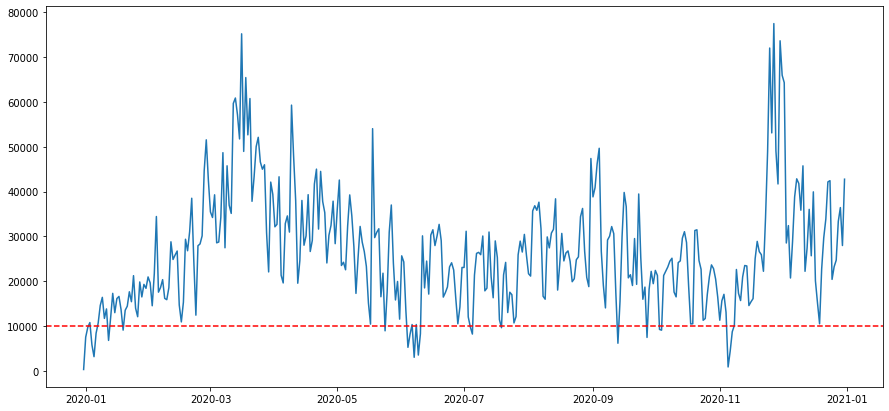

In [209]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(token_pr_date.index, [len(x) for x in token_pr_date])
# Add some labels
ax.axhline(10000, linestyle = "--", color = "r")
plt.show()

Generally with a few exceptions all the documents are above 10000 words, so should be fine for scoring with sentiment dictionary.

##### Plot the average daily happiness on r/wallstreetbets using the function you created in step 3 (remember the video lesson in Week 2, for plotting nice time-series).

In [210]:
#token_pr_date["document"].apply(lambda x: find_the_happiness(x, labMT))
token_pr_date.columns = ["date", "document"]
token_pr_date = token_pr_date.to_frame()

In [211]:
token_pr_date.columns = ["document"]
token_pr_date.head()
#Must be a better way. Takes ages!
token_pr_date["daily_happiness"] = token_pr_date["document"].progress_apply(lambda x: find_the_happiness(x, labMT))

100%|██████████| 367/367 [28:11<00:00,  4.61s/it]


In [320]:
# Just so we don't have to repeat the process.
daily_happiness = token_pr_date[["daily_happiness"]].copy()
daily_happiness.to_csv("daily_happiness.csv")
daily_words = token_pr_date[["document"]].copy()
daily_words.to_csv("daily_words.csv")

date
2019-12-31    [long, lyft, and, uber, dd, given, our, tradin...
2020-01-01    [what, are, you, guys, doing, new, year, s, ev...
2020-01-02    [opinions, on, baba, from, what, i, ve, read, ...
2020-01-03    [wwiii, crusader, etf, need, some, help, boys,...
2020-01-04    [do, you, know, any, broker, in, europe, that,...
                                    ...                        
2020-12-27    [baba, buy, the, dip, while, they, re, being, ...
2020-12-28    [did, i, lose, everything, on, baba, so, i, we...
2020-12-29    [yum, dd, kfc, launches, game, console, with, ...
2020-12-30    [popping, the, cherry, it, actually, been, lik...
2020-12-31    [start, yoloing, hi, guys, i, a, noob, girl, w...
Name: document, Length: 367, dtype: object

In [323]:
daily_happiness = pd.read_csv("daily_happiness.csv").set_index("date")
daily_words = pd.read_csv("daily_words.csv").set_index("date")

#### Compare happiness on r/wallstreetbets to happiness on Twitter using the hedonometer. What is (approximatively) the average value of the two time-series? How do you explain any difference between the two?
> * The approximate average happiness score for Twitter is 5.9-6.0. Again this supports the Pollyanna hypothesis. The 

In [213]:
##### Download the daily Close price of the S&P 500 Index and plot it over time. This index measures the stock performance of 500 large companies listed on stock exchanges in the United States, you can read more about it in the S&P 500 Wikipedia page.

In [324]:
SP500 = pd.read_csv("SP500.csv", parse_dates = ["Date"]).set_index("Date")
SP500.head()
# Finds the date from the submissions dateframe and limits the SP500 df to the same dates.
SP500 = SP500[(SP500.index>=str(WSB_submissions.date.min())) & (SP500.index<=str(WSB_submissions.date.max()))]
SP500 = SP500.iloc[::-1] # Reverse dataframe
SP500

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-12-31,3230.78,--,3215.18,3231.72,3212.03
2020-01-02,3257.85,--,3244.67,3258.14,3235.53
2020-01-03,3234.85,--,3226.36,3246.15,3222.34
2020-01-06,3246.28,--,3217.55,3246.84,3214.64
2020-01-07,3237.18,--,3241.86,3244.91,3232.43
...,...,...,...,...,...
2020-12-24,3703.06,--,3694.03,3703.82,3689.32
2020-12-28,3735.36,--,3723.03,3740.51,3723.03
2020-12-29,3727.04,--,3750.01,3756.12,3723.31


# Part 3: Word Shifts
Word shifts are related to how a certain word contribute to polarity.
##### Pick a day of your choice in 2020. We call it d. It is more interesting if you pick a day where you expect something relevant to occur (e.g. Christmas, New Year, Corona starting, the market crashes...).



In [325]:
#Convert the index to datetime format from string.
daily_happiness.index = pd.to_datetime(daily_happiness.index)
daily_words.index = pd.to_datetime(daily_words.index)

In [326]:
from datetime import datetime, timedelta
d_word = ""
min_h = daily_happiness["daily_happiness"].min()
date_min_h = daily_happiness[daily_happiness["daily_happiness"] == min_h].index[0]
d_min = date_min_h - timedelta(days = 7) # 7 days before as reference

In [367]:
# lets define two lists
import ast
import itertools
l = ast.literal_eval(daily_words["document"].loc[date_min_h])
l_ref = np.concatenate(daily_words[(daily_words.index < date_min_h) & (daily_words.index > d_min)].values)
l_ref = list(itertools.chain.from_iterable([ast.literal_eval(x) for x in l_ref]))

In [370]:
from collections import Counter
#Counter(l) # counts how many time a word appears.
# Want to count the relative freq
p = dict([(item[0], item[1]/len(l)) for item in Counter(l).items()])
p_ref = dict([(item[0], item[1]/len(l)) for item in Counter(l_ref).items()])
p

{'volatility': 0.0008978675645342312,
 'is': 0.01840628507295174,
 'coming': 0.0008978675645342312,
 'back': 0.002244668911335578,
 'how': 0.00202020202020202,
 'election': 0.0053872053872053875,
 'news': 0.0015712682379349046,
 'overshadowing': 0.0002244668911335578,
 'potential': 0.0004489337822671156,
 'market': 0.0029180695847362513,
 'turmoil': 0.0002244668911335578,
 'section': 0.0008978675645342312,
 'the': 0.04983164983164983,
 'a': 0.027384960718294053,
 'republican': 0.0008978675645342312,
 'senate': 0.0013468013468013469,
 'first': 0.0013468013468013469,
 'and': 0.020650953984287318,
 'foremost': 0.0002244668911335578,
 'to': 0.03164983164983165,
 'explain': 0.0004489337822671156,
 'why': 0.001122334455667789,
 'puts': 0.002244668911335578,
 'got': 0.001122334455667789,
 'melted': 0.0002244668911335578,
 'this': 0.010101010101010102,
 'week': 0.004264870931537598,
 'was': 0.004489337822671156,
 'key': 0.0006734006734006734,
 'component': 0.0002244668911335578,
 'of': 0.02603

In [371]:
# Top 10 values
sorted(p.items(), key = lambda x: x[1], reverse = True)[:10]

[('the', 0.04983164983164983),
 ('to', 0.03164983164983165),
 ('a', 0.027384960718294053),
 ('of', 0.026038159371492706),
 ('and', 0.020650953984287318),
 ('is', 0.01840628507295174),
 ('i', 0.014141414141414142),
 ('in', 0.01324354657687991),
 ('that', 0.011896745230078564),
 ('it', 0.010774410774410775)]

In [375]:
all_tokens = set(p.keys()).union(set(p_ref.keys()))
dp = dict([(token, p.get(token, 0) - p_ref.get(token, 0)) for token in all_tokens])
dp

{'jpow': -0.0006734006734006734,
 'speech': -0.0006734006734006734,
 'specialty': -0.0004489337822671156,
 'languages': 0.0004489337822671156,
 'confirm': -0.0006734006734006734,
 'hte': -0.0002244668911335578,
 'ran': -0.001122334455667789,
 'chill': -0.0004489337822671156,
 'awhile': -0.0004489337822671156,
 'reverses': -0.0004489337822671156,
 'otherrrrr': -0.0002244668911335578,
 'several': -0.0017957351290684624,
 'ev': -0.004264870931537598,
 'chills': -0.0002244668911335578,
 'arabia': -0.0002244668911335578,
 'nearby': -0.0002244668911335578,
 'reese': -0.0002244668911335578,
 'meant': -0.0006734006734006734,
 'bestbuy': -0.0004489337822671156,
 'halls': -0.0002244668911335578,
 'rent': -0.0002244668911335578,
 'pic': -0.0002244668911335578,
 'material': -0.0008978675645342312,
 'nigerian': -0.0006734006734006734,
 'materializes': -0.0004489337822671156,
 'makers': -0.0017957351290684624,
 'tougher': -0.0002244668911335578,
 'cities': -0.0002244668911335578,
 'grandpa': -0.0002

In [376]:
sorted(dp.items(), key = lambda x: x[1], reverse = True)[0:10]

[('lending', 0.00202020202020202),
 ('pfizer', 0.0015712682379349046),
 ('standards', 0.0015712682379349046),
 ('tightening', 0.0013468013468013469),
 ('imports', 0.001122334455667789),
 ('exports', 0.001122334455667789),
 ('qe', 0.0008978675645342312),
 ('coupled', 0.0006734006734006734),
 ('weather', 0.0006734006734006734),
 ('feb', 0.0006734006734006734)]

In [384]:
labMT_dict = dict(zip(labMT["Word"].values, labMT["Happiness Score"].values))
h = dict([(token, labMT_dict.get(token,np.nan) - 5) for token in all_tokens])
# We shift all the happiness score by -5

In [388]:
# Compute the product of delta p and h
dPhi = [(token, h[token]  *dp[token]) for token in all_tokens if not np.isnan(h[token])]
sorted(dPhi, key = lambda x:np.abs(x[1]), reverse=True)[:10]

[('i', -0.2955151515151515),
 ('you', -0.20903254769921442),
 ('earnings', -0.15385858585858583),
 ('like', -0.11112457912457911),
 ('in', -0.10987654320987655),
 ('my', -0.10623569023569025),
 ('will', -0.10280134680134677),
 ('all', -0.09940740740740737),
 ('on', -0.09314478114478107),
 ('up', -0.087003367003367)]

In [394]:
import shifterator as sh
# Can not be run with python 3.10
# https://stackoverflow.com/questions/70195545/module-collections-has-no-attribute-mapping-issue-on-macos-for-sdk-installa
sentiment_sh = sh.WeightedAvgShift(type2freq_1 = p_ref, type2freq_2 = p, type2score_1 = labMT_dict, reference_value = 5)
sentiment_sh.get_shift_graph(detailed = True, system_names = ["reference", "d"])

AttributeError: module 'collections' has no attribute 'Mapping'